## CCT College Dublin

**Assessment Cover Page**
_______________________________________________________________________


|**Module Title:** | Data Preparation |
|:---|---|
|**Assessment Title:** | DPrepHDip_CA1 |
|**Lecturer Name:** | David McQuaid |
|**Students Full Name:** | Miroslava Slavikova  |
|**Students Number:** | sba22382 |
|**Assessment Due Date:** | 5 April 2024 |
|**Date of Submission:** | 5 April 2024 |

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
vg_df = pd.read_csv("/content/vgsales.csv")

In [3]:
vg_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
vg_df.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
vg_df.shape

(16719, 16)

In [6]:
vg_df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [7]:
vg_df.isnull()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
16715,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
16716,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
16717,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True


In [8]:
vg_df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [9]:
min_sales = vg_df.loc[vg_df['Global_Sales'].idxmin()]
max_sales = vg_df.loc[vg_df['Global_Sales'].idxmax()]

# Extract Min Sales information
min_Year = min_sales['Year_of_Release']
min_Name = min_sales['Name']
min_sales = min_sales['Global_Sales']

# Extract Max Sales information
max_Year = max_sales['Year_of_Release']
max_Name = max_sales['Name']
max_sales = max_sales['Global_Sales']

# Print the result
print(f"The game with maximum sales is '{max_sales}' and name is '{max_Name}' released in {max_Year}.")
print(f"The game with minimum sales is '{min_sales}' and name is '{min_Name}' released in {min_Year}.")

The game with maximum sales is '82.53' and name is 'Wii Sports' released in 2006.0.
The game with minimum sales is '0.01' and name is 'Football Manager 2007' released in nan.


## What are the Global_Sales of each year?


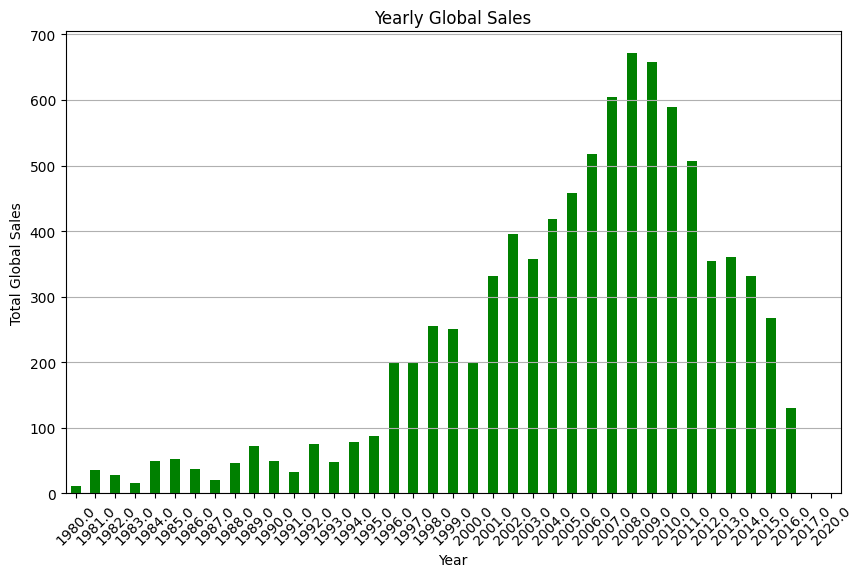

In [10]:
yearly_sales = vg_df.groupby('Year_of_Release')['Global_Sales'].sum()

# Convert float to int
yearly_sales_1 = yearly_sales.astype(int)

plt.figure(figsize=(10, 6))
yearly_sales_1.plot(kind='bar', color='green', rot=45)  # Combine xticks and rotation in one line
plt.xlabel('Year')
plt.ylabel('Total Global Sales')
plt.title('Yearly Global Sales')
plt.grid(axis='y')
plt.show()

<Axes: xlabel='Year_of_Release', ylabel='count'>

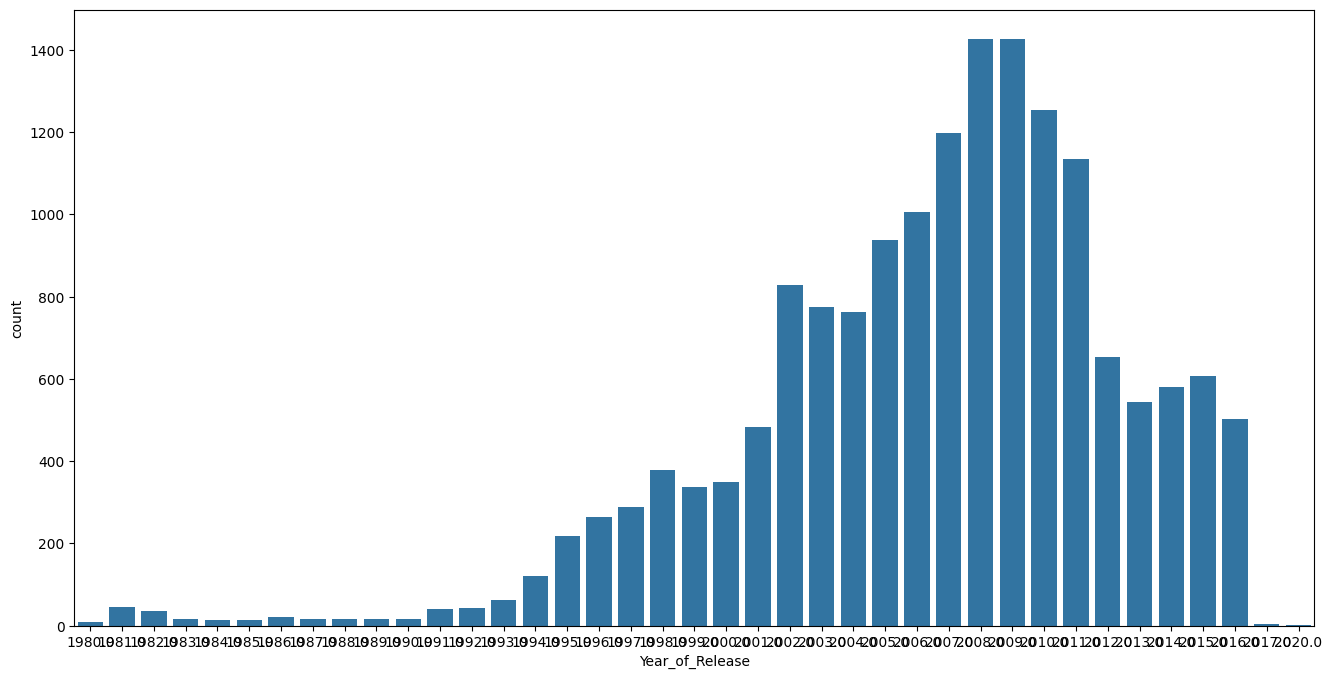

In [11]:
plt.figure(figsize=(16,8))
sns.countplot(data=vg_df,x='Year_of_Release',)

# Data Cleaning and Preprocessing

##Missing Value Check

In [12]:
vg_df.shape

(16719, 16)

In [13]:
vg_df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [14]:
vg_df.duplicated().sum()

0

## Imputing Missing Values
### Numeric Values with Mean


In [15]:
num = vg_df.select_dtypes(include = np.number).columns
vg_df[num]=vg_df[num].apply(pd.to_numeric,errors='coerce')
vg_df[num]=vg_df[num].fillna(vg_df[num].mean())
vg_df[num]

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
0,2006.0,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,322.000000
1,1985.0,29.08,3.58,6.81,0.77,40.24,68.967679,26.360821,162.229908
2,2008.0,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,709.000000
3,2009.0,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,192.000000
4,1996.0,11.27,8.89,10.22,1.00,31.37,68.967679,26.360821,162.229908
...,...,...,...,...,...,...,...,...,...
16714,2016.0,0.00,0.00,0.01,0.00,0.01,68.967679,26.360821,162.229908
16715,2006.0,0.00,0.01,0.00,0.00,0.01,68.967679,26.360821,162.229908
16716,2016.0,0.00,0.00,0.01,0.00,0.01,68.967679,26.360821,162.229908
16717,2003.0,0.01,0.00,0.00,0.00,0.01,68.967679,26.360821,162.229908


In [16]:
# Example: Fill missing categorical values with the most frequent value
categorical_cols = vg_df.select_dtypes(include='object').columns
vg_df[categorical_cols] = vg_df[categorical_cols].fillna(vg_df[categorical_cols].mode().iloc[0])

In [17]:
vg_df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

<ipython-input-18-4b5a987a4585>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(vg_df.corr())


<Axes: >

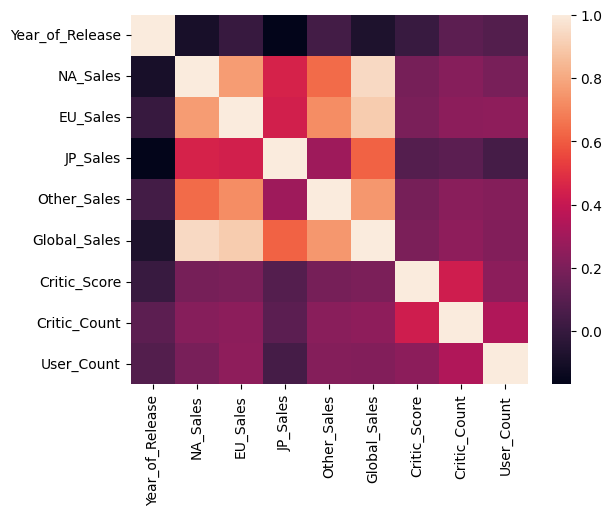

In [18]:
sns.heatmap(vg_df.corr())

<ipython-input-19-dabae6232416>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(vg_df.corr(),annot=True,linewidths = 0.1,cmap = 'YlOrBr', fmt=".2f",


<Axes: >

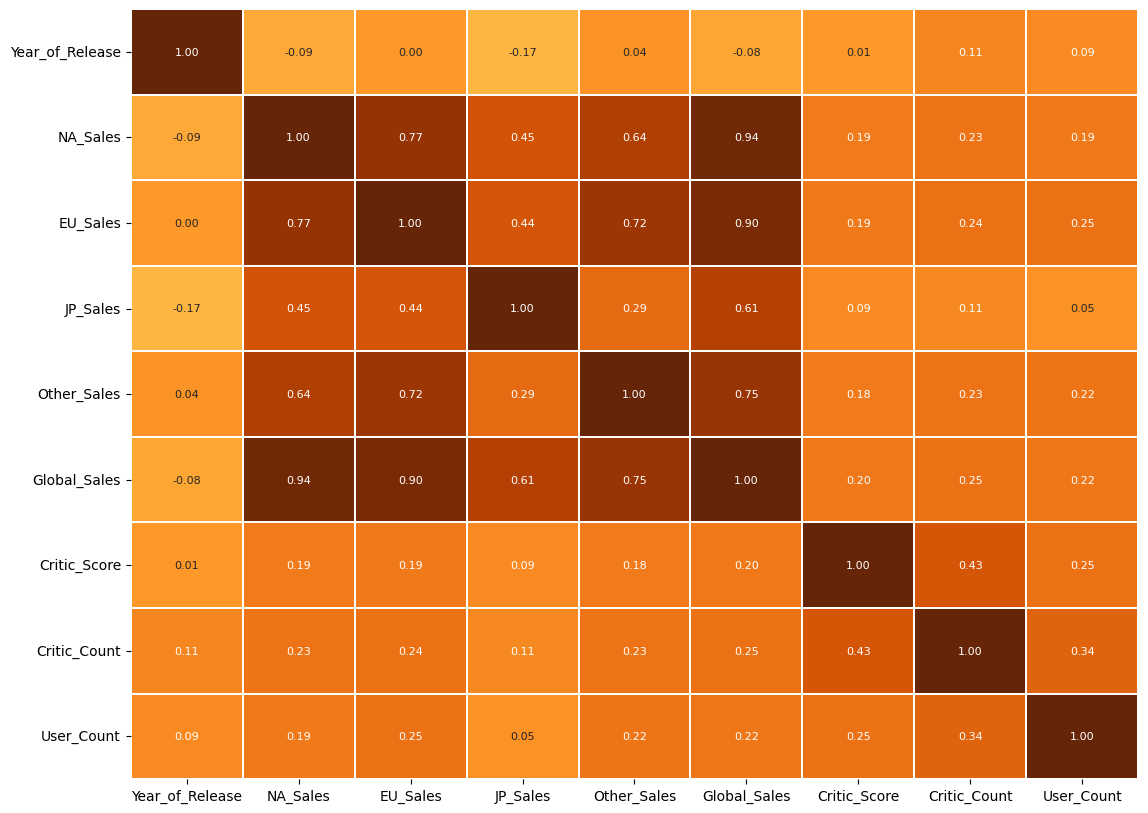

In [19]:
plt.figure(figsize=(13,10))
sns.heatmap(vg_df.corr(),annot=True,linewidths = 0.1,cmap = 'YlOrBr', fmt=".2f",
            vmin = -1, vmax = 1, linecolor = 'white', cbar = False,annot_kws={'size': 8})

# Exploratory Data Analysis (EDA)

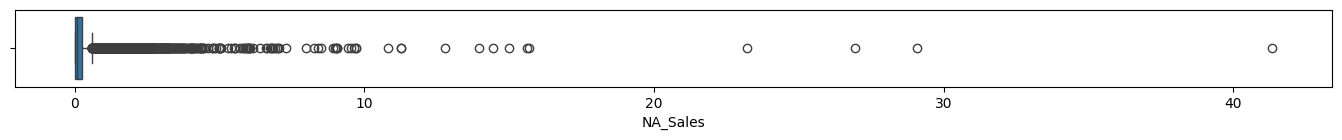

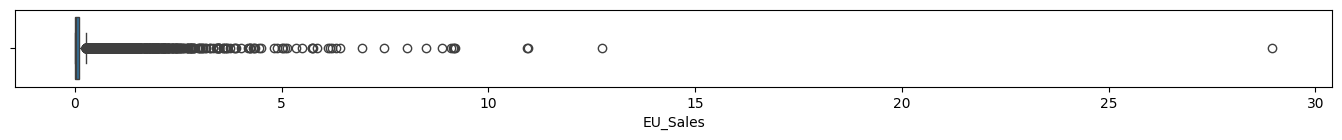

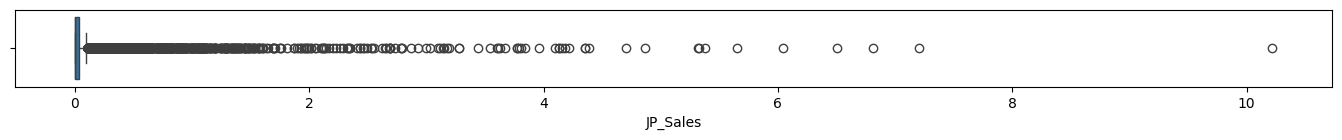

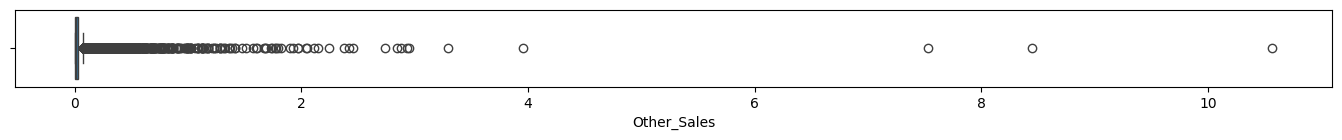

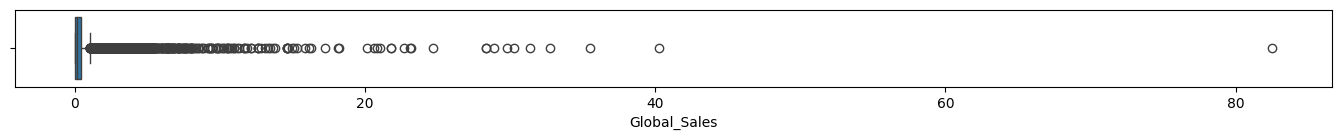

In [20]:
features = ["NA_Sales","EU_Sales", "JP_Sales","Other_Sales","Global_Sales"]

for column in vg_df[features]:
        plt.figure(figsize=(17,1))
        sns.boxplot(data = vg_df, x = column)

<Axes: xlabel='Rating', ylabel='Global_Sales'>

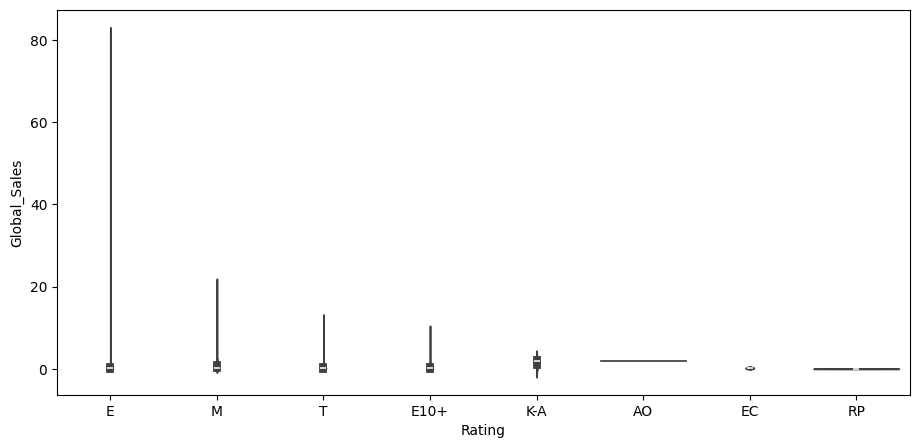

In [21]:
# Relation between the rating and sales
plt.figure(figsize=(11,5))
sns.violinplot(x = vg_df['Rating'],y = vg_df['Global_Sales'])

# Part 1:

1.	What are the top 5 games by global sales?  



In [22]:
top_5_max_sales = vg_df.nlargest(5, 'Global_Sales')

# Iterate over the top 5 rows and print the game's name and sales
for idx, row in top_5_max_sales.iterrows():
    print(f"Game #{idx+1}: '{row['Name']}' with sales of {row['Global_Sales']} million units.")

Game #1: 'Wii Sports' with sales of 82.53 million units.
Game #2: 'Super Mario Bros.' with sales of 40.24 million units.
Game #3: 'Mario Kart Wii' with sales of 35.52 million units.
Game #4: 'Wii Sports Resort' with sales of 32.77 million units.
Game #5: 'Pokemon Red/Pokemon Blue' with sales of 31.37 million units.


2.	Is there a correlation between the “na_sales” and “jp_sales” for the years 2010-2014?  


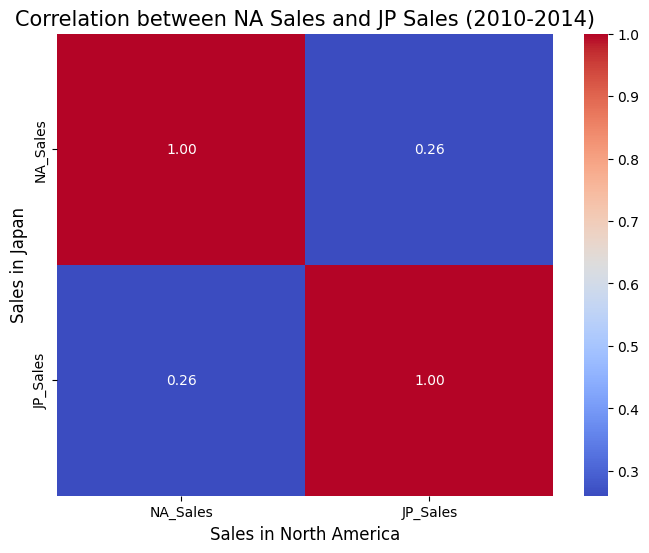

The correlation coefficient between NA_Sales and JP_Sales for the years 2010-2014 is: 0.26043134778810034


In [23]:
# Filter the DataFrame for the years 2010-2014
filtered_df = vg_df[(vg_df['Year_of_Release'] >= 2010) & (vg_df['Year_of_Release'] <= 2014)]

# Calculate the correlation coefficient between "NA_Sales" and "JP_Sales"
correlation_coefficient = filtered_df['NA_Sales'].corr(filtered_df['JP_Sales'])


# Calculate the correlation matrix
correlation_matrix = filtered_df[['NA_Sales', 'JP_Sales']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between NA Sales and JP Sales (2010-2014)', fontsize=15)
plt.xlabel('Sales in North America', fontsize=12)
plt.ylabel('Sales in Japan', fontsize=12)
plt.show()

# Print the correlation coefficient
print(f"The correlation coefficient between NA_Sales and JP_Sales for the years 2010-2014 is: {correlation_coefficient}")

3.	What is the distribution of the most popular 4 game genres?  

In [24]:
Game_Global_sales=vg_df.groupby('Genre').mean()['Global_Sales']
Game_name= [i for i , vg_df in vg_df.groupby('Genre')]

<ipython-input-24-80074cda44c1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Game_Global_sales=vg_df.groupby('Genre').mean()['Global_Sales']


In [25]:
#Genre of Global Sales across the game
px.bar(x = Game_name,y=Game_Global_sales,color=Game_Global_sales,width=800,height=400,labels={
                     "x": "Game",
                     "y": "Game Global sales"
                 })

4.	Do older games (2005 and earlier) have a higher MEAN “eu_sales” than newer games (after 2005)?  


In [26]:
games_before_2005 = vg_df[(vg_df['Year_of_Release'] <= 2005)]
games_after_2005 = vg_df[(vg_df['Year_of_Release'] > 2005)]

In [27]:
# Calculate the correlation coefficient between "NA_Sales" and "JP_Sales"
EU_Sales_mean_before = games_before_2005['EU_Sales'].mean()
EU_Sales_mean_after = games_after_2005['EU_Sales'].mean()
print(f"Yes, Games 2005 and earlier have a higher MEAN : { EU_Sales_mean_before } “EU_Sales” than newer games after 2005 : { EU_Sales_mean_after }")

Yes, Games 2005 and earlier have a higher MEAN : 0.1479159168984132 “EU_Sales” than newer games after 2005 : 0.14335847633415047


5.	What are the 3 most common “developer” in the dataset?

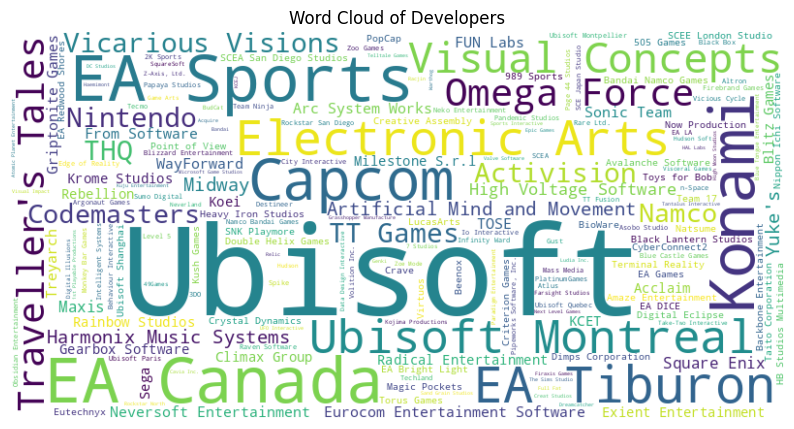

In [41]:
import plotly.express as px
from wordcloud import WordCloud

Developer_count = vg_df.groupby('Developer').size().reset_index(name='count')

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(Developer_count['Developer'], Developer_count['count'])))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Developers')
plt.show()


In [43]:
# Sort the DataFrame by 'count' column in descending order
Developer_count = Developer_count.sort_values(by='count', ascending=False)

# Get the top 3 most common developers
top_3_developers = Developer_count.head(3)

print(f"Top 3 most common developers {top_3_developers}")

Top 3 most common developers       Developer  count
1539    Ubisoft   6827
449   EA Sports    172
431   EA Canada    167


#Part - 2

# Machine Learning Model

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

In [30]:
X=vg_df.drop(['Global_Sales','Name','Platform','Genre','Publisher','Developer','Rating','User_Score'],axis=1)
y=vg_df['Global_Sales']

In [31]:
X_train,X_test, y_train , y_test =train_test_split(X,y,test_size=0.2)

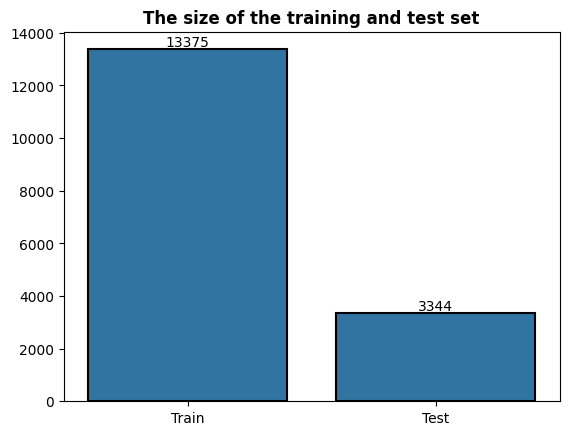

In [32]:
p1 = sns.barplot(x = ['Train', 'Test'],
            y = [y_train.shape[0], y_test.shape[0]],
                linewidth = 1.5,
                edgecolor = 'black')
p1.bar_label(p1.containers[0])

plt.title('The size of the training and test set', fontweight = 'bold')
plt.show()

In [33]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [34]:
y_pred=rfr.predict(X_test)

Part - 2
## Statistically Relevant :

As per the below we find from the above statics is Most Important feature is "North American Sales" (NA_Sales). Most of the North American sales have major contribution in Global sales.   

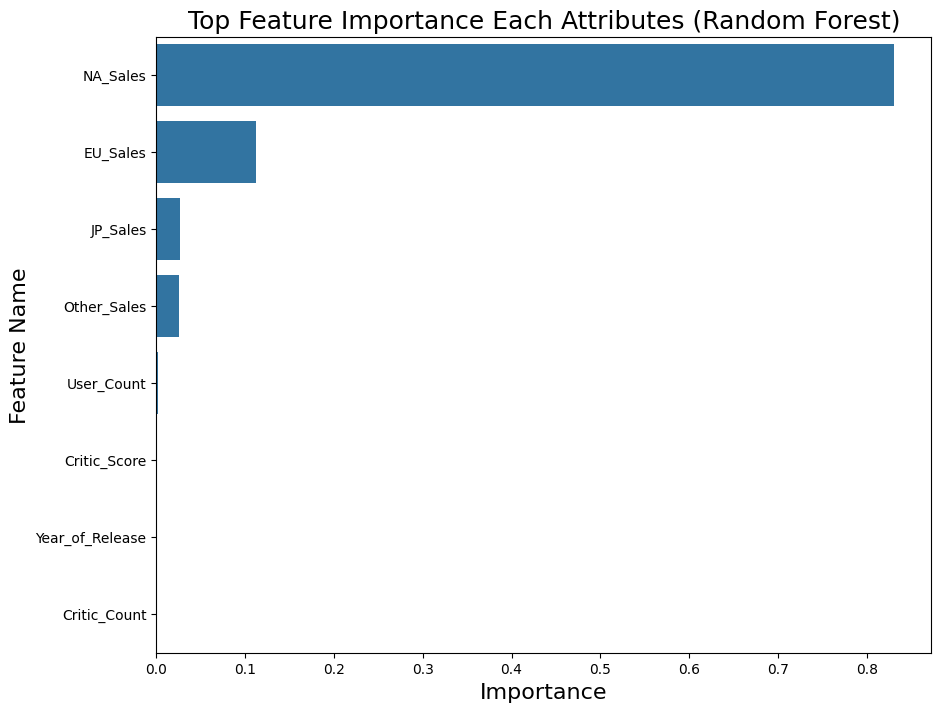

In [35]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfr.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [36]:
print('MAE:', mean_absolute_error(y_test,y_pred))
print('r2_score:', r2_score(y_test,y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test,y_pred))

MAE: 0.025964120888662495
r2_score: 0.9784122317454724
MAPE: 0.04883676528155212


In [37]:
games = vg_df.groupby('Genre')['Name'].nunique()
games

Genre
Action          1959
Adventure       1062
Fighting         613
Misc            1330
Platform         588
Puzzle           498
Racing           772
Role-Playing    1227
Shooter          825
Simulation       730
Sports          1379
Strategy         585
Name: Name, dtype: int64

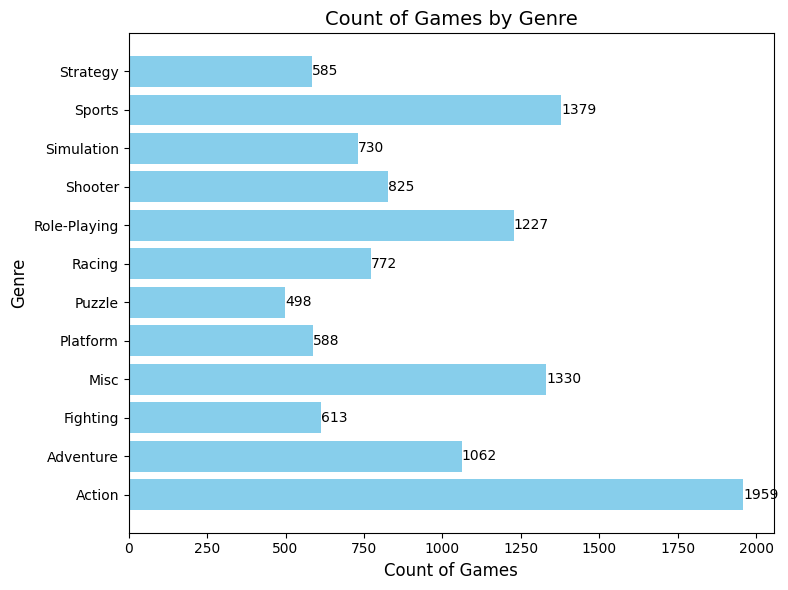

In [38]:
genres = games.index
counts = games.values

# Plot the counts with customizations
plt.figure(figsize=(8, 6))
bars = plt.barh(genres, counts, color='skyblue')

# Add labels and title with custom font sizes
plt.xlabel('Count of Games', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.title('Count of Games by Genre', fontsize=14)

# Add data labels on the right side of the bars
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, str(int(bar.get_width())),
             fontsize=10, va='center', color='black')


plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

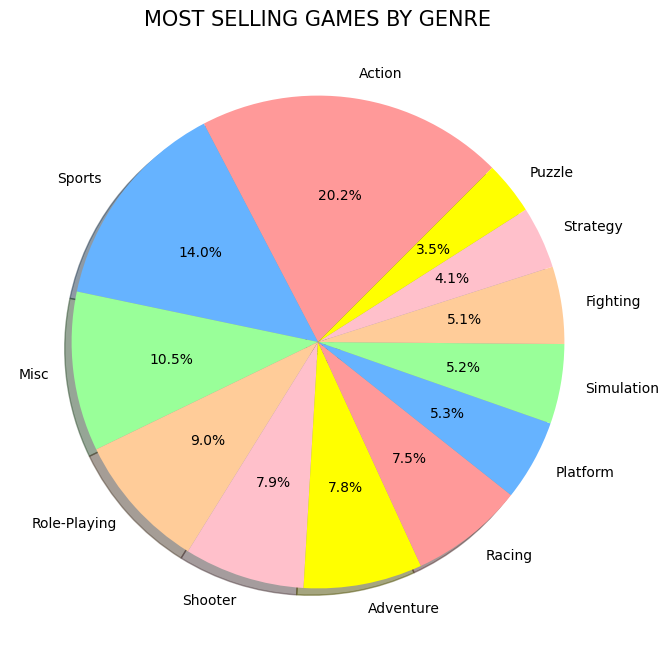

In [39]:
labels = vg_df["Genre"].value_counts().index
sizes = vg_df["Genre"].value_counts()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',"pink","yellow"]
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=45)
plt.title('MOST SELLING GAMES BY GENRE',color = 'black',fontsize = 15)

plt.show()
